In [3]:
### 데이터 분석 및 그래프 시각화 Library Load

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>1. 전력소비량 데이터 조회 및 전처리</h1>

In [4]:
df_con1 = pd.read_csv("201001_202112_월별_시도별_전력사용량_final.csv")
df_con1

,Unnamed: 0,연도,시도,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,0,2010,강원도,1480180,1382020,1308429,1317499,1185530,1114450,1055938,1088438,1058865,1116695,1297575,1442404
1,1,2010,경기도,8725482,8341902,7574084,7727001,7156767,7152029,7589292,7961584,7659696,6868326,7866013,8452695
2,2,2010,경상남도,2922775,2719682,2648326,2665253,2453568,2429359,2550149,2600386,2594082,2428098,2623317,2914222
3,3,2010,경상북도,3743904,3471888,3484251,3454660,3321968,3301601,3344445,3428974,3394857,3370268,3498295,3773932
4,4,2010,광주광역시,712924,682498,632293,642843,603935,605548,667137,697066,692544,605233,632721,685316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,199,2021,전라남도,2844658,2738900,2724005,2670493,2722103,2648105,2856350,3073050,2836764,2726495,2679718,2966246
200,200,2021,전라북도,1997136,1830234,1771153,1725471,1667691,1697453,1803462,1923328,1791056,1679464,1736069,1864342
201,201,2021,제주특별자치도,518258,503324,450805,461823,430958,437447,486838,544310,495549,446949,438179,473291
202,202,2021,충청남도,4434196,4039445,4077387,3876573,3877528,3770865,4137216,4257399,3978322,3855222,4108694,4388778


In [5]:
### 각 행정구역의 2010.01. ~ 2021.12. 월별 전력소비량 데이터를 시각화하고자 함.

# 1. 서울특별시의 경우

data1 = df_con1[df_con1["시도"] == "서울특별시"]
data2 = data1.T # DataFrame의 행렬을 바꿔줌
data2

,8,25,42,59,76,93,110,127,144,161,178,195
Unnamed: 0,8,25,42,59,76,93,110,127,144,161,178,195
연도,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
시도,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
1월,4398183,4562632,4349335,4486310,4155574,4281117,4151770,4139967,4477102,4416889,4197026,4400410
2월,4168168,4264449,4298788,4189413,3974971,4023566,4174917,4166700,4469940,4127699,4037392,4134045
3월,3624186,3736362,3837539,3652776,3547923,3592926,3729909,3649111,3657824,3582654,3657444,3550751
4월,3719082,3682652,3695515,3638393,3466188,3512071,3457927,3470755,3503967,3591552,3410967,3449257
5월,3426951,3425703,3483656,3439856,3305028,3324249,3340823,3290791,3366946,3419987,3295839,3324763
6월,3729030,3713716,3736558,3706936,3649218,3637371,3715673,3621612,3686242,3676047,3730294,3701621
7월,4219590,4049595,4075847,4099931,4072242,3982172,4101888,4273771,4260544,4146986,4074026,4406553


In [6]:
data3 = data2.reset_index() # reset_index()로 index를 생성
data4 = data3.drop([0,1,2]) # 0부터 2번 행은 사용하지 않으므로 drop()을 사용하여 삭제

data4.columns

Index(['index', 8, 25, 42, 59, 76, 93, 110, 127, 144, 161, 178, 195], dtype='object')

In [7]:
# '8'이라는 column에 '25' 이후의 데이터를 세로로 이어붙이기(melt 사용)
data5 = pd.melt(data4,
                    id_vars=['index'],
                    value_vars=[8, 25, 42, 59, 76, 93, 110, 127, 144, 161, 178, 195])
data5

,index,variable,value
0,1월,8,4398183
1,2월,8,4168168
2,3월,8,3624186
3,4월,8,3719082
4,5월,8,3426951
...,...,...,...
139,8월,195,5103868
140,9월,195,4145083
141,10월,195,3578614
142,11월,195,3537141


In [8]:
# variable column 삭제(default : axis=0, 행을 제거하는게 기본값이나 1을 입력하면 열을 삭제할 수 있음)
data6 = data5.drop('variable',axis=1) 
data6

,index,value
0,1월,4398183
1,2월,4168168
2,3월,3624186
3,4월,3719082
4,5월,3426951
...,...,...
139,8월,5103868
140,9월,4145083
141,10월,3578614
142,11월,3537141


In [12]:
# 각 column의 이름을 '기간', '전력소비량'으로 설정(inplace는 잠시 보류)
data7 = data6.rename(columns = {'index' : '기간', 'value' : '전력소비량'}, inplace = False)
data_seoul = data7 # 행렬반전 후 data_seoul이라는 변수로 저장
data_seoul

,기간,전력소비량
0,1월,4398183
1,2월,4168168
2,3월,3624186
3,4월,3719082
4,5월,3426951
...,...,...
139,8월,5103868
140,9월,4145083
141,10월,3578614
142,11월,3537141


<h4>서울특별시 전력소비량 시각화</h4>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3

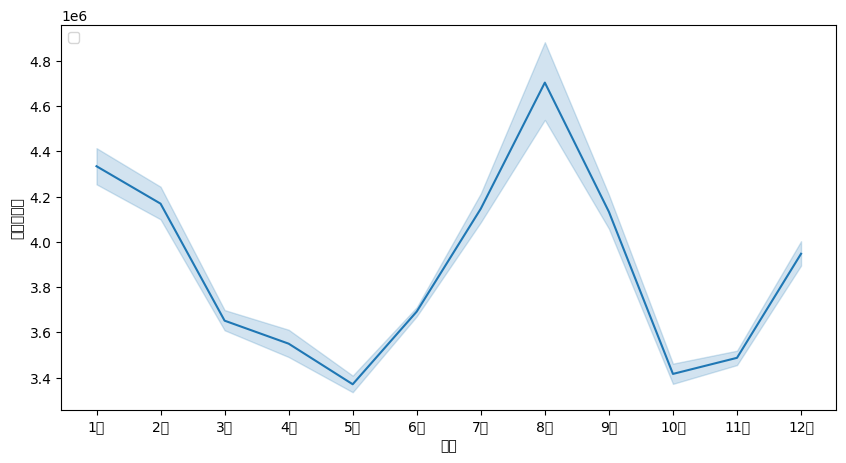

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(data=data_seoul,x='기간',y='전력소비량')
plt.legend(bbox_to_anchor=(0,1),loc=2)

<h1>물가지수 데이터 조회 및 전처리</h1>

In [10]:
### 물가지수 데이터 DataFrame Load

cpi1 = pd.read_csv("201001_202112_월별_시도별_소비자물가지수.csv", encoding="cp949")
cpi1

,시도별(1),시도별(2),2010.01,2010.02,2010.03,2010.04,2010.05,2010.06,2010.07,2010.08,...,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
0,전국,소계,85.351,85.523,85.696,86.041,86.128,86.041,86.214,86.647,...,101.84,101.98,102.05,102.05,102.26,102.75,103.17,103.35,103.87,104.04
1,전국,서울특별시,84.055,84.225,84.566,84.906,84.906,84.736,84.991,85.417,...,101.57,101.68,101.74,101.68,101.88,102.33,102.67,102.90,103.20,103.32
2,전국,부산광역시,84.423,84.680,84.937,85.193,85.279,85.108,85.365,85.792,...,101.91,102.00,102.03,101.95,102.19,102.61,103.17,103.22,103.63,103.87
3,전국,대구광역시,84.121,84.377,84.632,84.888,85.058,84.888,85.058,85.399,...,101.99,102.09,102.14,102.12,102.36,102.90,103.43,103.56,104.11,104.30
4,전국,인천광역시,85.588,85.848,86.022,86.456,86.542,86.456,86.716,87.064,...,101.83,102.02,102.08,102.11,102.36,102.94,103.41,103.56,104.06,104.38
5,전국,광주광역시,85.953,86.214,86.563,86.825,86.912,86.912,87.174,87.522,...,101.92,102.13,102.24,102.19,102.36,102.82,103.15,103.27,103.95,104.10
6,전국,대전광역시,86.760,86.848,87.024,87.551,87.639,87.551,87.727,88.255,...,101.90,102.09,102.13,102.19,102.40,102.70,103.08,103.23,103.71,103.97
7,전국,울산광역시,86.572,86.747,87.274,87.537,87.626,87.537,87.713,88.152,...,101.86,101.88,102.00,101.93,102.20,102.71,103.26,103.22,103.86,104.12
8,전국,세종특별자치시,-,-,-,-,-,-,-,-,...,102.05,102.33,102.40,102.48,102.61,103.11,103.20,103.55,104.01,104.16
9,전국,경기도,85.766,86.026,85.854,86.199,86.286,86.199,86.373,86.718,...,101.87,102.01,102.10,102.17,102.33,102.85,103.21,103.43,103.97,104.16


In [18]:
### 각 행정구역의 2010.01. ~ 2021.12. 월별 물가지수 데이터를 시각화하고자 함.
# 17개 시도단위를 각각 분리
# 1. 서울특별시
cpi_seoul1 = cpi1[cpi1["시도별(2)"] == "서울특별시"]
cpi_seoul2 = cpi_seoul1.T # 기간을 좌측으로 오게끔 Transpose
cpi_seoul3 = cpi_seoul2.reset_index() # reset_index()로 index 재설정
cpi_seoul4 = cpi_seoul3.drop([0,1]) # 0번과 1번 행은 사용하지 않으므로 drop()으로 삭제
cpi_seoul4

,index,1
2,2010.01,84.055
3,2010.02,84.225
4,2010.03,84.566
5,2010.04,84.906
6,2010.05,84.906
...,...,...
141,2021.08,102.33
142,2021.09,102.67
143,2021.10,102.9
144,2021.11,103.2


In [25]:
# 각 column의 이름을 '기간', '물가지수'으로 설정(inplace는 잠시 보류)
cpi_seoul5 = cpi_seoul4.rename(columns = {'index' : '기간', 1 : '전력소비량'}, inplace = False)
cpi_seoul5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 2 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      144 non-null    object
 1   전력소비량   144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [27]:
cpi_seoul = cpi_seoul5.astype({'전력소비량':'float'})
cpi_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 2 to 145
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기간      144 non-null    object 
 1   전력소비량   144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


<Axes: >

c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3\envs\sprint2\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\SUNGHWA_KEPCO\anaconda3

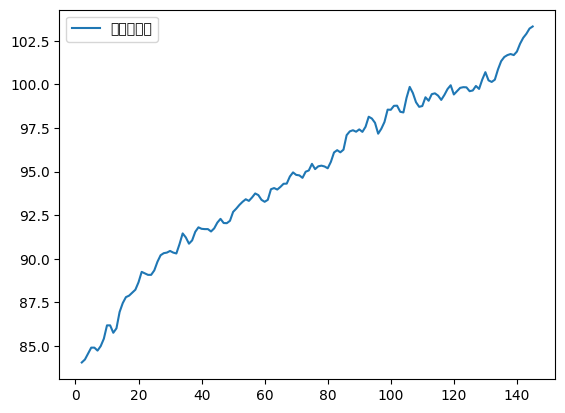

In [28]:
cpi_seoul.plot()